# 1.Introduction to Keras.
Keras is a high-level API for building and training deep learning models. It runs on top of other
deep learning frameworks such as TensorFlow, Theano, and CNTK, and provides a simple interface for
designing complex neural networks. Here, we’ll use Keras with TensorFlow as the backend. To begin,
install Keras and TensorFlow:

In [12]:
pip install keras tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf
print(tf.keras.__version__)

3.9.2


# 2.1 Why not Just Use Numpy?
1. NumPy Lacks Automatic Differentiation:
Neural Networks rely on backpropagation to compute gradients for optimization. Numpy does not
support automatic differentiation.

Manual Gradient Calculation in Numpy

In [15]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
    return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
    return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
    x -= learning_rate * gradient(x)
    print(f"x: {x}, f(x): {f(x)}")

x: 4.0, f(x): 16.0
x: 3.2, f(x): 10.240000000000002
x: 2.56, f(x): 6.5536
x: 2.048, f(x): 4.194304
x: 1.6384, f(x): 2.68435456
x: 1.31072, f(x): 1.7179869184000003
x: 1.0485760000000002, f(x): 1.0995116277760004
x: 0.8388608000000002, f(x): 0.7036874417766403
x: 0.6710886400000001, f(x): 0.45035996273704976
x: 0.5368709120000001, f(x): 0.2882303761517119


Gradient Computations with Keras.

In [16]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
    y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy()) # Output: 10.0

10.0


# 2. Numpy is Slow for Large Models:
• Numpy runs only on CPU and does not support GPU acceleration.

• Deep Learning requires millions of matrix operations, which Numpy alone can not optimize effi-
ciently.

Example: Matrix Multiplication Speed (Numpy vs. Tensorflow on GPU).

In [17]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.09800052642822266
TensorFlow Time: 0.060515403747558594


# 3. No Pre-built Activation Functions and Layers in NumPy.
In deep learning, we use functions like:

• sigmoid:

• Softmax:

With Numpy we’d have to manually implement every function. In keras it already has built it.

Implementation of Activation Function with Keras.

In [18]:
from tensorflow.keras.layers import Dense
# from tensorflow.keras.activation import sigmoid
layer = Dense(64, activation='sigmoid')

# 4. Keras supports Model Training, Numpy Does not:
Once your model is built, training it in Numpy is complex:

• Compute forward pass.

• Compute loss.

• Compute backward pass manually.

• Update weights using gradients.

Manually Training Network in Numpy.

# Exercise
Task 1: Data Preparation

Loading the Data

In [24]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define dataset paths

test_dir =  r"C:\Users\user\Downloads\Copy of devnagari digit (1)\DevanagariHandwrittenDigitDataset\Test"
train_dir = r"C:\Users\user\Downloads\Copy of devnagari digit (1)\DevanagariHandwrittenDigitDataset\Train"

# Image size
IMG_SIZE = (28, 28)
NUM_CLASSES = 10  # Digits 0-9

def load_data(data_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Get sorted folder names (digits 0-9)
    class_map = {name: i for i, name in enumerate(class_names)}  # Label mapping
    
    for label in class_names:
        class_path = os.path.join(data_dir, label)
        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize(IMG_SIZE)  # Resize to 28x28
            img_array = np.array(img) / 255.0  # Normalize (0-1)
            images.append(img_array)
            labels.append(class_map[label])
    
    return np.array(images), np.array(labels)

# Load training and testing data
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Reshape images for FCN (Flattened)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Split training data into train & validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Task 2: Build the FCN Model
Model Architecture

In [25]:
# Build Fully Connected Network (FCN) model
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(28*28,)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(NUM_CLASSES, activation='softmax')  # Output layer
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Task 3: Compile the Model
Model Compilation

In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Task 4: Train the Model
Model Training

In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2408 - loss: 2.1488 - val_accuracy: 0.7129 - val_loss: 1.1287
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7547 - loss: 0.8837 - val_accuracy: 0.8424 - val_loss: 0.5024
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8580 - loss: 0.4334 - val_accuracy: 0.8874 - val_loss: 0.3294
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9080 - loss: 0.2918 - val_accuracy: 0.9306 - val_loss: 0.2395
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9454 - loss: 0.1917 - val_accuracy: 0.9444 - val_loss: 0.1873
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9597 - loss: 0.1476 - val_accuracy: 0.9521 - val_loss: 0.1612
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9682 - loss: 0.1173 - val_accuracy: 0.9571 - val_loss: 0.1404
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9749 - loss: 0.0999 - val_accuracy: 0

# Task 5: Evaluate the Model
Model Evaluation

In [28]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9762 - loss: 0.0878
Test Accuracy: 0.9737


# Task 6: Save and Load the Model
Model Saving and Loading


In [29]:
# Save the model
model.save("devnagari_fcn_model.keras")

# Load the saved model
loaded_model = keras.models.load_model("devnagari_fcn_model.keras")

In [30]:
# Re-evaluate the loaded model
loaded_loss, loaded_acc = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Accuracy: {loaded_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9762 - loss: 0.0878
Loaded Model Accuracy: 0.9737


# Task 7: Predictions
Making Predictions

In [31]:
# Making Predictions
predictions = loaded_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
# Display some predictions
print("Sample Predictions:", predicted_labels[:10])

Sample Predictions: [0 0 0 0 0 0 0 0 0 0]


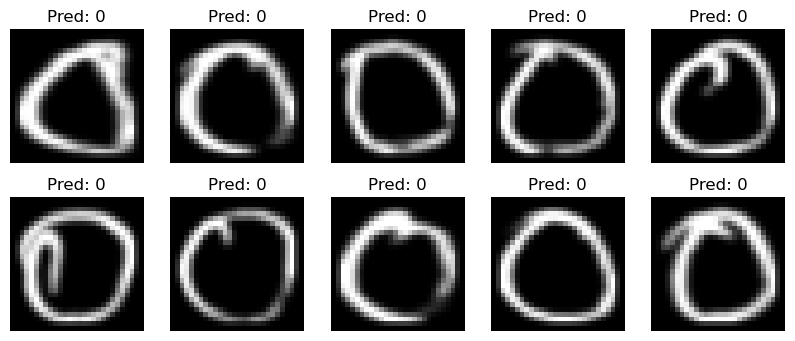

In [33]:
import matplotlib.pyplot as plt
# Visualize some predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis("off")
plt.show()